In [1]:
from astropy import units as u
from astropy_healpix import HEALPix
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hpy
from more_itertools import locate

In [2]:
# Reads in data files for use in readData.py

hdulist = fits.open('/Users/mtownsend/anaconda/Data/survey-dr7-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
hdulist2 = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
hdulist3 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr7.fits') # this is one sweep file of the DECaLS data
hdulist4 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr7.fits') # this is one sweep file of the DECaLS data

# hdulist = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr5-specObj-dr14.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS AND DECALS
# hdulist2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr14.fits') # this is SDSS redshifts etc for LRGs
# hdulist3 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010.fits') # this is one sweep file of the DECaLS data


SpecObj_data = hdulist[1].data
SDSS_data = hdulist2[1].data
DECaLS_data1 = hdulist3[1].data
DECaLS_data2 = hdulist4[1].data

# ---------------------------------------------------------------------------------------------------------------------
id_ALL1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, rmag_BKG1, gmag_BKG1, zmag_BKG1, color_BKG1, rmag_LRG1, gmag_LRG1, zmag_LRG1, color_LRG1, z_LRG1, gdepth_LRG1, rdepth_LRG1, zdepth_LRG1, gdepth_BKG1, rdepth_BKG1, zdepth_BKG1, gobs_LRG1, robs_LRG1, zobs_LRG1, gobs_BKG1, robs_BKG1, zobs_BKG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1 = readData(SpecObj_data, SDSS_data, DECaLS_data1)

id_ALL2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, rmag_BKG2, gmag_BKG2, zmag_BKG2, color_BKG2, rmag_LRG2, gmag_LRG2, zmag_LRG2, color_LRG2, z_LRG2, gdepth_LRG2, rdepth_LRG2, zdepth_LRG2, gdepth_BKG2, rdepth_BKG2, zdepth_BKG2, gobs_LRG2, robs_LRG2, zobs_LRG2, gobs_BKG2, robs_BKG2, zobs_BKG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2 = readData(SpecObj_data, SDSS_data, DECaLS_data2)


ra = np.concatenate([ra_LRG1, ra_LRG2, ra_BKG1, ra_BKG2])
dec = np.concatenate([dec_LRG1, dec_LRG2, dec_BKG1, dec_BKG2])
z_LRG = np.concatenate([z_LRG1, z_LRG2])
gmag = np.concatenate([gmag_LRG1, gmag_LRG2, gmag_BKG1, gmag_BKG2])
rmag = np.concatenate([rmag_LRG1, rmag_LRG2, rmag_BKG1, rmag_BKG2])
zmag = np.concatenate([zmag_LRG1, zmag_LRG2, zmag_BKG1, zmag_BKG2])
color = np.concatenate([color_LRG1, color_LRG2, color_BKG1, color_BKG2])

print('end readdata')

length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  5182673
length of id_ALL:  5182673
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1624
length of idcut: 5182673
length of idcut = 1 (is an LRG in DECaLS-only file): 1233
length of idcut = 0 (is not an LRG in DECaLS-only file): 5181440
length of z_lrg: 1233
length of sdss array:  4851200
length of lrg only array: 1406221
length of DECaLS targets in brick:  4008392
length of id_ALL:  4008392
<class 'numpy.ndarray'>
length of id_MATCHED with LRG_cut (id_LRG): 1624
length of idcut: 4008392
length of idcut = 1 (is an LRG in DECaLS-only file): 391
length of idcut = 0 (is not an LRG in DECaLS-only file): 4008001
length of z_lrg: 391
end readdata


In [3]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


In [4]:
row = 10
column = 10
# rmag = np.concatenate([rmag_LRG, rmag_BKG])
# color = np.concatenate([color_LRG, color_BKG])
# creates histogram for survey sources; excludes LRGs
H, xedges, yedges = np.histogram2d(rmag, color, normed=False)
# print("xedges: ", xedges)
# print("yedges: ", yedges)

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/(25.) # * (3600.**2.)) # converts square degrees to square arcseconds

length phi:  992440
pixnums:  [504766 506132 506133 ... 506232 506234 506234]
504766
length pixnums:  992440
length ra:  992440


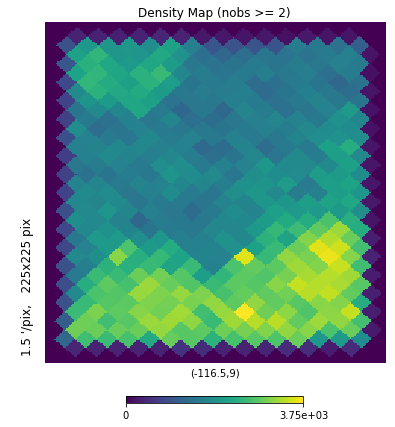

In [6]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 256
npixel = hpy.nside2npix(nside)

# ra_cut = ra[np.where(zmag <= 21.5)]
# dec_cut = dec[np.where(zmag <= 21.5)]

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))
# Convert angles theta and phi to pixel numbers
pixnums = hpy.ang2pix(nside, theta, phi, nest=True)
print('pixnums: ', pixnums)
print(pixnums[0])
print('length pixnums: ', len(pixnums))
print('length ra: ', len(ra))


# Create a HEALPix map from pix
mapp = np.bincount(pixnums, minlength=npixel)
# print('map where ne 0: ', mapp[np.where(mapp > 0)])
# print('length map == 0: ', len(mapp[np.where(mapp == 0)]))
# print('length map: ', len(mapp))

# masked_map = np.zeros(len(mapp))
# masked_map[(mapp == 0)] = 1

# m = hp.ma(mapp)
# m.mask = masked_map

# Plot mapp
hpy.gnomview(mapp, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (nobs >= 2)')
plt.show()

In [9]:
# Search for pixels within a defined radius

distance = 0.5
distance_kpc = distance * 10. ** 3.  # in kpc

ra_LRG = np.concatenate([ra_LRG1, ra_LRG2])
dec_LRG = np.concatenate([dec_LRG1, dec_LRG2])

# converts physical distance to degree
dist = []
for i in range(len(kpc_DA)):
    dist.append((distance_kpc / kpc_DA[i]) * 1. / 3600.) # in degree


hp = HEALPix(nside=nside, order='nested')

search_pix = []
for i in range(len(dist)):
    search_pix.append(hp.cone_search_lonlat(ra_LRG[i] * u.deg, dec_LRG[i] * u.deg, radius=dist[i] * u.deg))
# search_pix = np.array(search_pix)
print(search_pix[0])
print(type(search_pix[0]))
print(len(search_pix))

[504766]
<class 'numpy.ndarray'>
1624


In [93]:
# pixnums = matches angles theta/phi to pixel numbers
# search_pix = the pixel indices within some radius of an LRG
    # list of arrays; list is the length of the number of LRGs in the sample; array length is variable
# --------------------------------------------------------------------------------------------------------


# indices = np.where((pixnums == 8076271) | (pixnums == 8076269))
# print(indices)
# print(len(indices))
# print(len(np.where((pixnums == 8076271) | (pixnums == 8076269))))
# print(pixnums[np.where(pixnums == 8076269)])

indices = np.where(pixnums[i] == search_pix[0])
print(indices)

# print(pixnums[np.where(search_pix[0])])
# print(len(pixnums[np.where(search_pix[0])]))

# print(pixnums[np.where(pixnums[0] == search_pix[0])])
# print(pixnums[0])

# temp1 = [1,1,2,5,6]
# temp2 = [[1,2], [6,7], [1,2,5,6,7]]

# indices = []
# for i in range(3):
#     for j in range(5):
#         temp = np.where(temp1[j] == temp2[i])
# #     indices.append(temp)

# print(len(indices))
# print(indices)

# a = [x for x in pixnums if x in search_pix[0]]
# print(a)
# print(len(a))

# pixels = []
# for i in range(len(search_pix)):
#     temp = [x for x in pixnums if x in search_pix[i]]
#     pixels.append(temp)
#     print(i)
# print(len(pixels))
# print(pixels[0])


# pix0 = []
# for i in range(len(search_pix)):
#     pix0.append(np.where(pixnums == search_pix[i]))
    
# print(len(pix0))
    
# pix0  = np.array(pix0)
# pix0 = np.hstack(pix0)
# print(len(pix0))
# print(type(pix0))
# print(pix0[0])

IndexError: list assignment index out of range

In [89]:
# plug pixel indices into rmag and color catalogs to get CMD 

hist2d, x_notuse, y_notuse = np.histogram2d(rmag[np.where((pixnums == 8076271) | (pixnums == 8076269))], color[np.where((pixnums == 8076271) | (pixnums == 8076269))], bins=(xedges, yedges),normed=False)
print(hist2d)

# hist2d, x_notuse, y_notuse = np.histogram2d(rmag[pix0[0]], color[pix0[0]], bins=(xedges, yedges),normed=False)
# print(hist2d)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   5.   6.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  66.  55.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 164.  80.   4.   1.   0.   0.   0.]
 [  0.   0.   0.   6.   1.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
